In [16]:
# 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. 데이터 로드 및 구조 확인

In [17]:
iris = sns.load_dataset('iris')

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. 기술통계량

In [20]:
print(iris.groupby('species')['petal_length'].describe())


            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


In [21]:
print(iris['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. 시각화

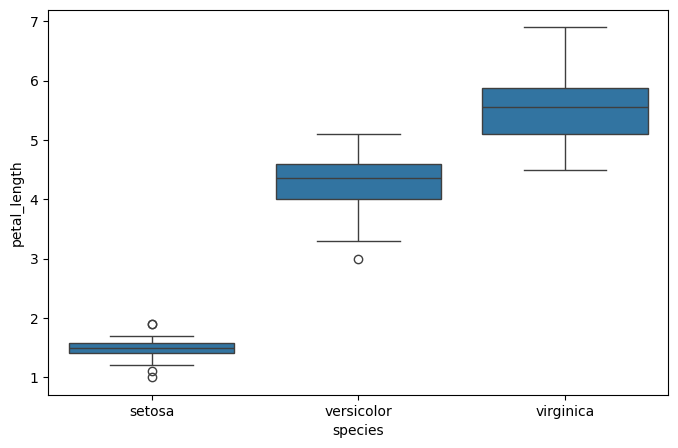

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

## 4. 정규성 검정 (Shapiro-Wilk)

In [23]:
species = iris['species'].unique()

for i in species:
    data = iris[iris['species'] == i]['petal_length']
    stat, p_value = shapiro(data)
    print(f"{i}: p-value = {p_value:.4f}")

setosa: p-value = 0.0548
versicolor: p-value = 0.1585
virginica: p-value = 0.1098


## 5. 등분산성 검정 (Levene)

In [24]:
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p_value = levene(setosa, versicolor, virginica)

print(f"Levene test p-value = {p_value:.4f}")

Levene test p-value = 0.0000


## 6. ANOVA 가설 수립

1. 귀무가설 (H₀) : 세 species 간 petal length의 평균은 모두 같다.
2. 대립가설 (H₁) : 적어도 하나의 species는 petal length의 평균이 다르다.

## 7. One-way ANOVA

In [25]:
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

F, p_value = f_oneway(setosa, versicolor, virginica)

print(f"F = {F:.4f}")
print(f"p-value = {p_value}")

F = 1180.1612
p-value = 2.8567766109615584e-91


## 8. 사후검정 (Tukey HSD)

In [26]:
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 9. 결과 요약

Boxplot, One-way ANOVA, Tukey HSD 사후검정 결과를 종합하면 petal length는 setosa가 가장 짧고, versicolor가 중간, virginica가 가장 긴 것으로 나타났으며 세 그룹 간 차이는 모두 통계적으로 유의하였다.

## 10. 회귀 분석

In [27]:
x = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

coefficient = pd.Series(model.coef_, index=x.columns)

print("MSE:", mse)
print("R²:", r2)
print("회귀계수:")
print(coefficient)

MSE: 0.14232775062916003
R²: 0.9482033665817743
회귀계수:
sepal_length    0.730814
sepal_width    -0.602030
petal_width     1.471932
dtype: float64
